In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import datasets

In [5]:
data=pd.read_csv("/content/Salary_dataset.csv")
X=data[['YearsExperience']]
y=data['Salary']

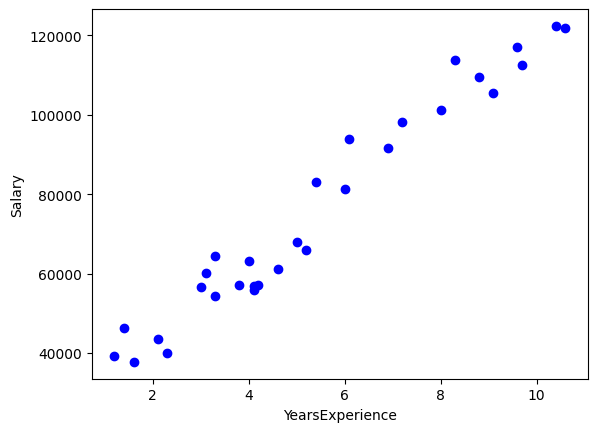

In [6]:
plt.scatter(X,y,color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# **question no** 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# question no **2**

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred_lr=model.predict(X_test)

In [11]:
mse=mean_squared_error(y_test,y_pred_lr)
r2=r2_score(y_test,y_pred_lr)
print("The Mean Squared Error (MSE) is:", mse)
print("The R-squared score (R2) is:", r2)

The Mean Squared Error (MSE) is: 49830096.855908394
The R-squared score (R2) is: 0.9024461774180497


# question no **3**

In [12]:
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)


In [13]:
regression_report = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²)'],
    'Value': [mae, mse, rmse, r2]
})


In [14]:
print(regression_report)

                           Metric         Value
0       Mean Absolute Error (MAE)  6.286454e+03
1        Mean Squared Error (MSE)  4.983010e+07
2  Root Mean Squared Error (RMSE)  7.059044e+03
3                  R-squared (R²)  9.024462e-01


# **question no 4**

In [16]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [17]:
data=pd.DataFrame(X,columns=iris.feature_names)
data['target']=y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred_knn=knn.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0


# **question no 5**

In [30]:
from sklearn.tree import DecisionTreeClassifier


In [31]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y=cancer.target

In [32]:
data = pd.DataFrame(X, columns=cancer.feature_names)
data['target'] = y

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
y_pred_dt = model.predict(X_test)

In [61]:
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
#print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## **question no 6**

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [56]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [57]:
clf=LogisticRegression(random_state=42)
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [58]:
y_pred_lr=clf.predict(X_test)

In [60]:
acc=accuracy_score(y_test,y_pred_lr)
print("Accuracy is ",acc)
cm=confusion_matrix(y_test,y_pred_lr)
print("Confusion Matrix is ",cm)
cr=classification_report(y_test,y_pred_lr)
print("Classification Report is ",cr)

Accuracy is  0.956140350877193
Confusion Matrix is  [[39  4]
 [ 1 70]]
Classification Report is                precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# **question no 7**

In [42]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [43]:
iris=load_iris()
X=iris.data
y=iris.target

In [44]:
data = pd.DataFrame(X, columns=iris.feature_names)
data['species'] = y

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
model=SVC()
model.fit(X_train,y_train)


SVC()

In [47]:
y_pred_svm=model.predict(X_test)

In [53]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **question no 8**

# **For each question in the solution, I have written the code to generate the classification report directly within the respective question**

**classification report for knn(question no 4)**

Classification Report:

                 precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                            1.00        30
    macro avg       1.00      1.00      1.00        30
    weighted avg    1.00      1.00      1.00        30


**classification report for decision tree classifier(question no5)**

Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                            0.95       114
    macro avg       0.94      0.94      0.94       114
    weighted avg    0.95      0.95      0.95       114

**classification report for logistic regression(question no 6)**

Classification Report       
         
                 precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                            0.96       114
    macro avg       0.96      0.95      0.95       114
    weighted avg    0.96      0.96      0.96       114

**classification report for svm(question no 7)**

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                            1.00        30
    macro avg       1.00      1.00      1.00        30
    weighted avg    1.00      1.00      1.00        30